In [3]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline



In [2]:
# Create reference to CSV file
#csv_path = "../Resources/Metro_Interstate_Traffic_Volume.csv"
csv_path = "Metro_Interstate_Traffic_Volume.csv"
# Import the CSV into a pandas DataFrame
Traffic_Volume_df = pd.read_csv(csv_path)
Traffic_Volume_df = pd.read_csv(csv_path)
Traffic_Volume_df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


<Axes: >

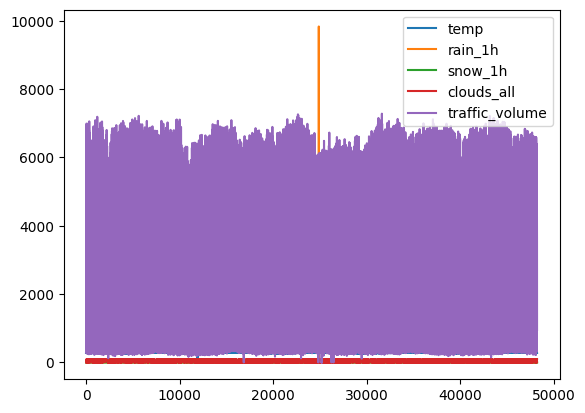

In [4]:
Traffic_Volume_df.plot()

In [5]:
Traffic_Volume_df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [7]:
# Convert Kelvin to Farenheit

# Create function to convert from K to F
def kelvin_to_fahrenheit(kelvin):
    fahrenheit = (9/5) * (kelvin - 273.15) + 32
    return fahrenheit


# Apply the function to the DataFrame
Traffic_Volume_df['temp_f'] = Traffic_Volume_df['temp'].apply(kelvin_to_fahrenheit)


# Show first five rows
Traffic_Volume_df.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,temp_f
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,59.234
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,61.178
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,61.574
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,62.564
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,64.382
